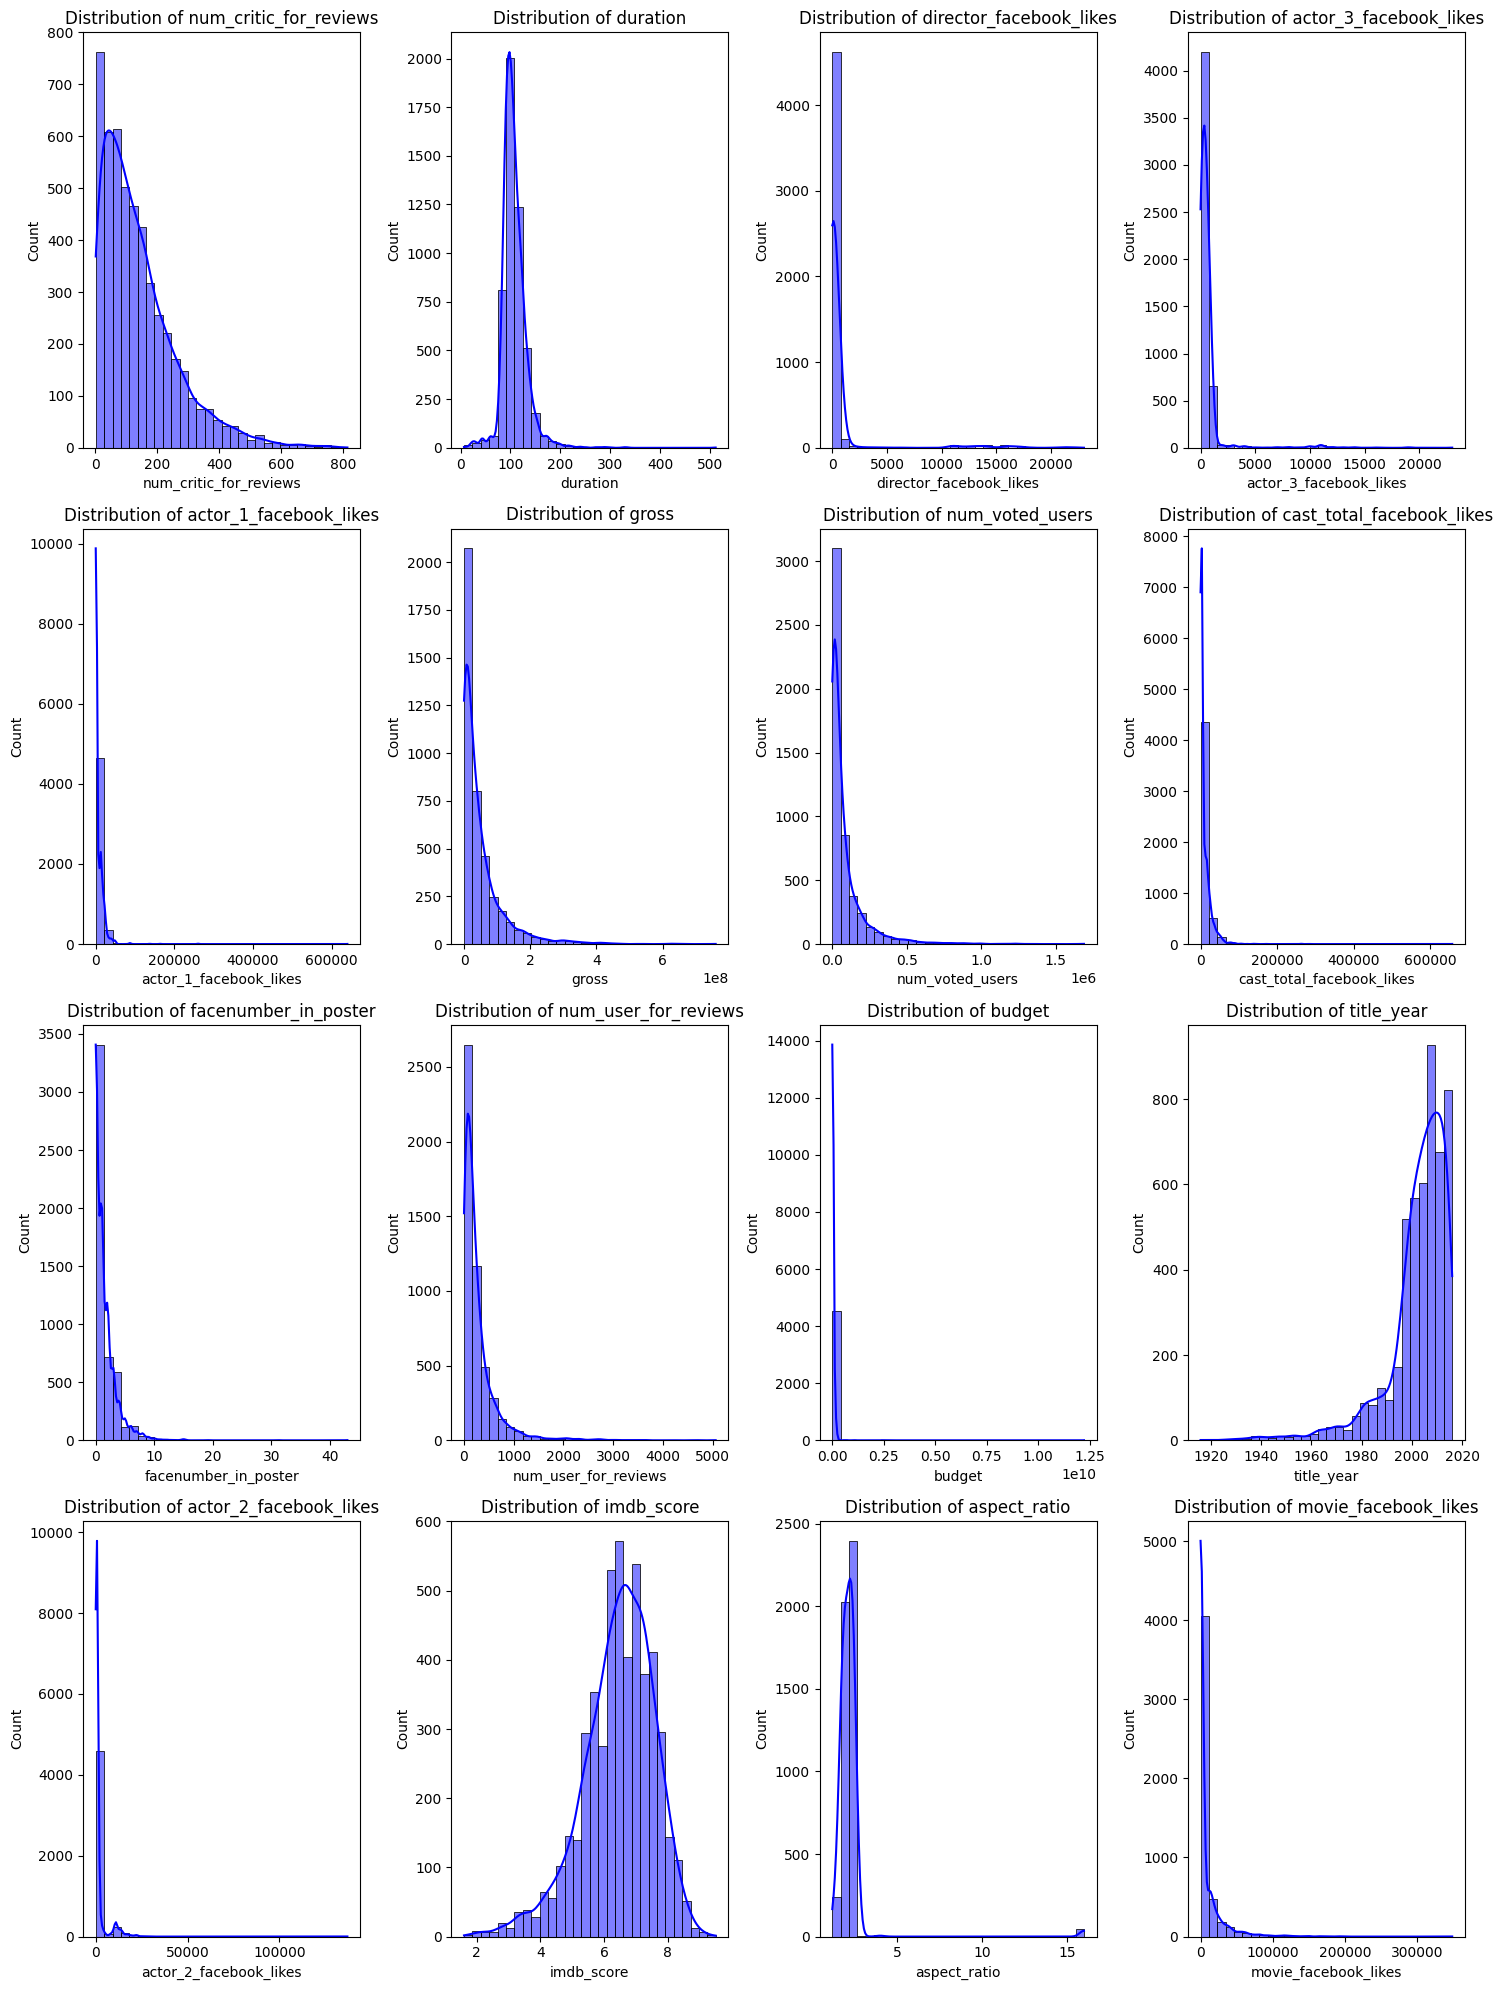

In [1]:
# Основная статистика для числовых столбцов
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('movie_metadata.csv')

# Список числовых признаков
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Определяем количество строк и столбцов для подграфиков
n_cols = 4
n_rows = (len(numerical_cols) // n_cols) + (1 if len(numerical_cols) % n_cols != 0 else 0)

plt.figure(figsize=(15, n_rows * 5))  # Размер фигуры в зависимости от количества строк
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()



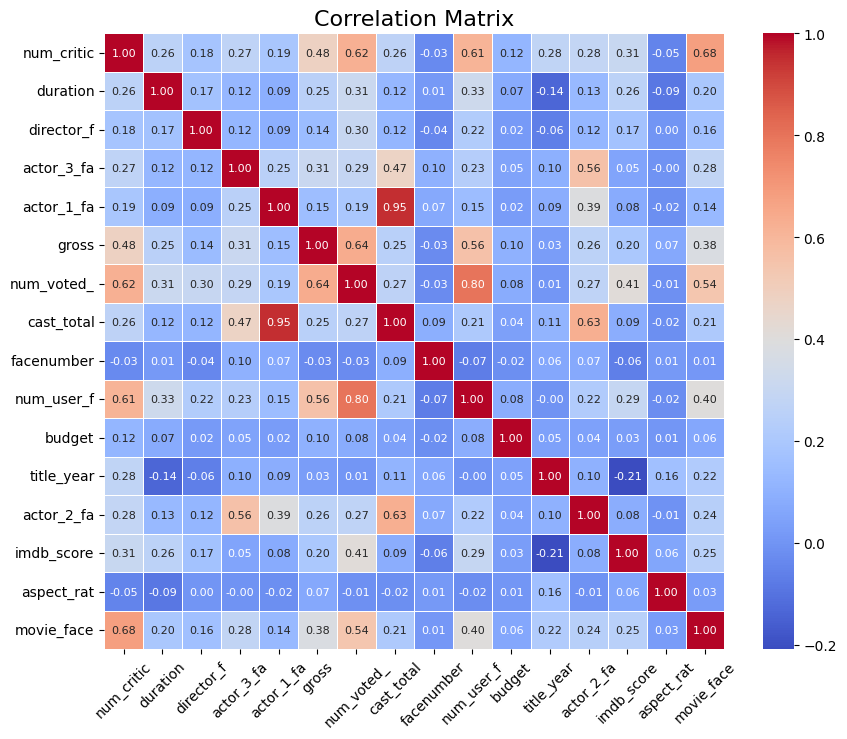

In [2]:
# Correlation matrix
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df.columns = [col[:10] for col in df.columns]  
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, 
            annot_kws={'size': 8})  
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=10, rotation=45)  
plt.yticks(fontsize=10, rotation=0)   
plt.show()


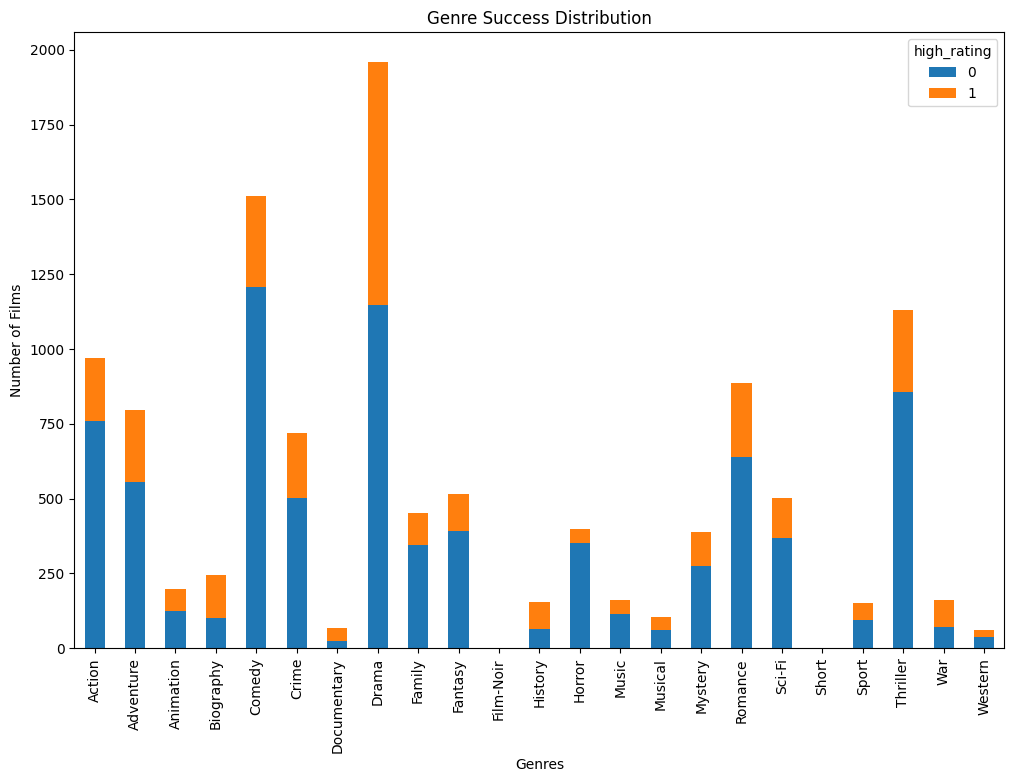

In [15]:
#Distribution by genre. Let's see which genres are more popular among successful movies.
df_genres = df['genres'].str.get_dummies(sep='|')
df_genres['high_rating'] = (df['imdb_score'] > 7).astype(int)
genre_success = df_genres.groupby('high_rating').sum()
genre_success.T.plot(kind='bar', figsize=(12, 8), stacked=True)
plt.title('Genre Success Distribution')
plt.xlabel('Genres')
plt.ylabel('Number of Films')
plt.show()

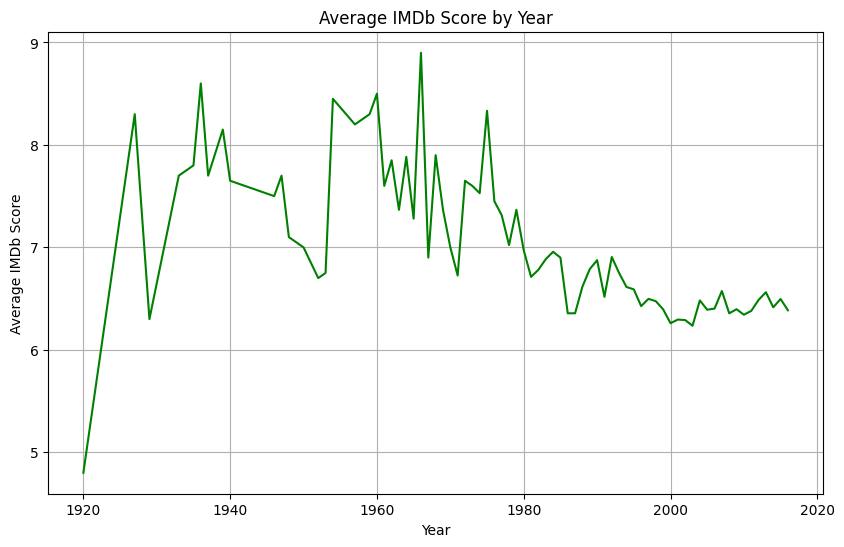

In [16]:
#Movie ratings by year. Let's see how the average movie rating changes over time.
# Средний рейтинг фильмов по годам
df_avg_rating = df.groupby('title_year')['imdb_score'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_avg_rating.index, y=df_avg_rating.values, color='green')
plt.title('Average IMDb Score by Year')
plt.xlabel('Year')
plt.ylabel('Average IMDb Score')
plt.grid(True)
plt.show()

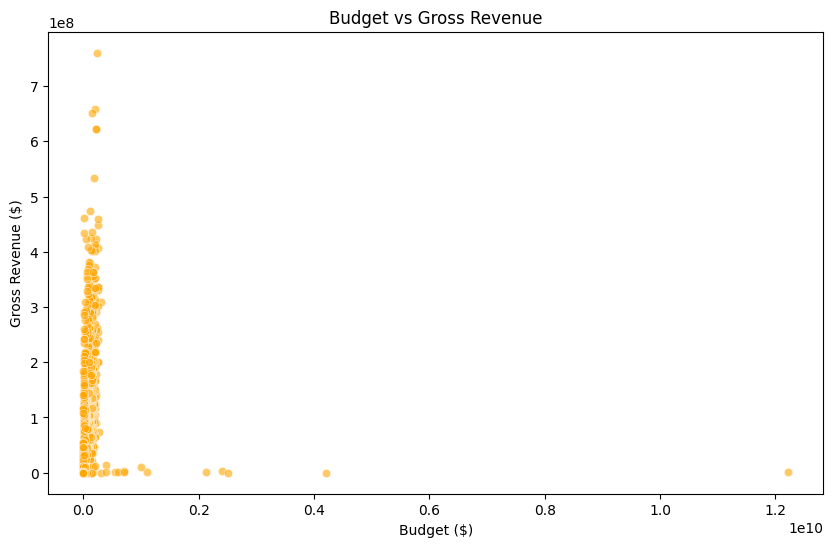

In [5]:
#Impact of budget on box office receipts. Let's look at the relationship between budget and box office receipts, which will help us understand how important this parameter is for the success of a movie.
# Визуализация зависимости бюджета от кассовых сборов
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='gross', data=df, alpha=0.6, color='orange')
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget ($)')
plt.ylabel('Gross Revenue ($)')
plt.show()

In [6]:
#Box office forecasting model. For simplicity, let's try linear regression to predict box office (gross) using parameters such as budget and rating.
from sklearn.linear_model import LinearRegression

# Подготовка данных для модели
df_cleaned = df.dropna(subset=['budget', 'imdb_score', 'gross'])
X = df_cleaned[['budget', 'imdb_score']]  # Признаки
y = df_cleaned['gross']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозирование
y_pred = model.predict(X_test)

# Оценка модели
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Absolute Error: 47114005.78584834
Mean Squared Error: 5227397904465844.0
R² Score: 0.03131079365291578


In [17]:
#Анализ важности факторов успеха фильма – выяснение ключевых факторов, влияющих на рейтинг и успех.
import pandas as pd
import numpy as np
data = pd.read_csv('movie_metadata.csv')
data['success'] = np.where(data['gross'] > data['budget'], 1, 0)
features = ['budget', 'duration', 'gross', 'title_year', 'genres'] 
data = data[features + ['success']]
data = pd.get_dummies(data, columns=['genres'], drop_first=True)
data.dropna(inplace=True)
X = data.drop(columns=['success'])
y = data['success']
data.head()


,budget,duration,gross,title_year,success,genres_Action|Adventure,genres_Action|Adventure|Animation|Comedy|Crime|Family|Fantasy,genres_Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller,genres_Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi,genres_Action|Adventure|Animation|Comedy|Family,...,genres_Mystery|Western,genres_Romance,genres_Romance|Sci-Fi|Thriller,genres_Romance|Short,genres_Sci-Fi,genres_Sci-Fi|Thriller,genres_Thriller,genres_Thriller|War,genres_Thriller|Western,genres_Western
0,237000000.0,178.0,760505847.0,2009.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,300000000.0,169.0,309404152.0,2007.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,245000000.0,148.0,200074175.0,2015.0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,250000000.0,164.0,448130642.0,2012.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,263700000.0,132.0,73058679.0,2012.0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9473
Confusion Matrix:
[[326  27]
 [ 14 411]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       353
           1       0.94      0.97      0.95       425

    accuracy                           0.95       778
   macro avg       0.95      0.95      0.95       778
weighted avg       0.95      0.95      0.95       778



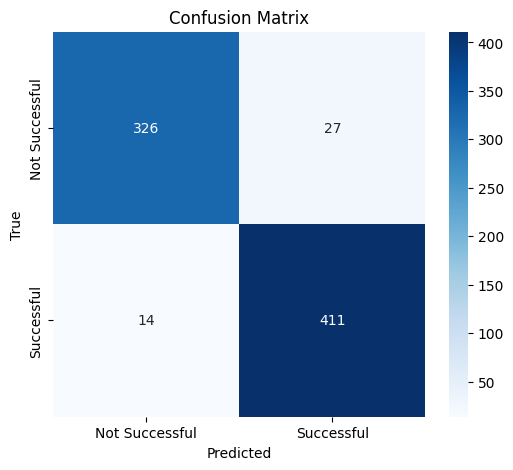

In [19]:
#Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Successful', 'Successful'], yticklabels=['Not Successful', 'Successful'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

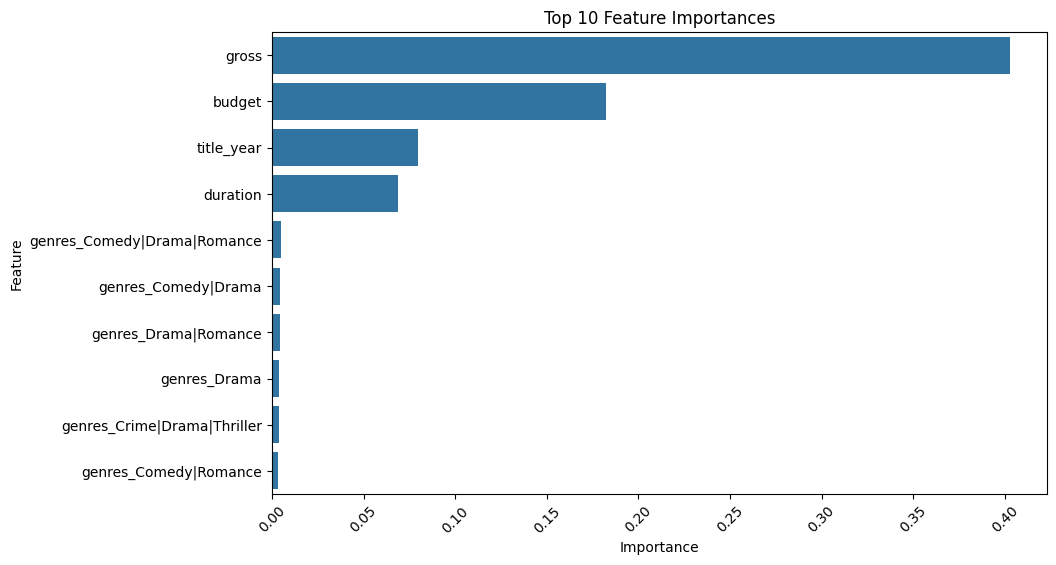

In [20]:
# Визуализация важности признаков
import matplotlib.pyplot as plt
import seaborn as sns
feature_importances = model.feature_importances_
features_list = X.columns
top_n = 10
top_features = sorted(zip(feature_importances, features_list), reverse=True)[:top_n]
top_importances, top_feature_names = zip(*top_features)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_importances, y=top_feature_names)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xticks(rotation=45)
plt.show()

In [11]:
#Анализ успеха фильма по кассовым сборам

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загружаем и очищаем данные
df = pd.read_csv('movie_metadata.csv')

# Убираем пропуски в нужных столбцах
df = df.dropna(subset=['gross', 'budget', 'imdb_score', 'duration', 'num_user_for_reviews'])

# Создание нового признака: успешный/неуспешный фильм
df['successful'] = (df['gross'] > 100_000_000).astype(int)

# Выбор признаков
features = ['budget', 'duration', 'num_user_for_reviews', 'imdb_score', 'num_voted_users']
X = df[features]
y = df['successful']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Обучение модели
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Предсказание
y_pred = model.predict(X_test_scaled)

# Оценка качества модели
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8933161953727506
Confusion Matrix:
 [[619  15]
 [ 68  76]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       634
           1       0.84      0.53      0.65       144

    accuracy                           0.89       778
   macro avg       0.87      0.75      0.79       778
weighted avg       0.89      0.89      0.88       778



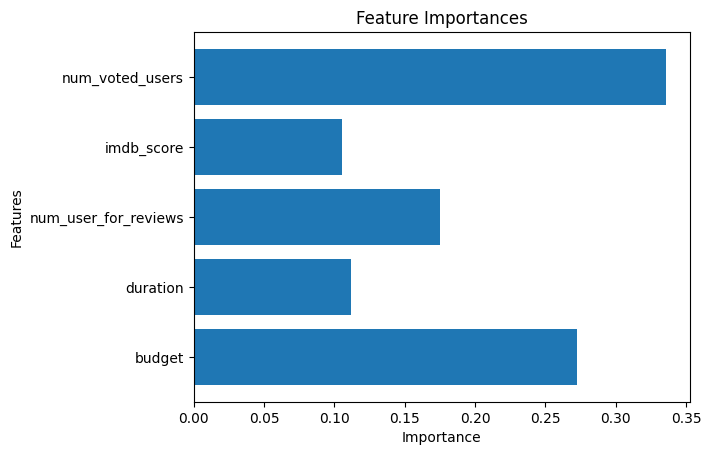

In [13]:
import matplotlib.pyplot as plt

# Важность признаков
importances = model.feature_importances_
plt.barh(features, importances)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

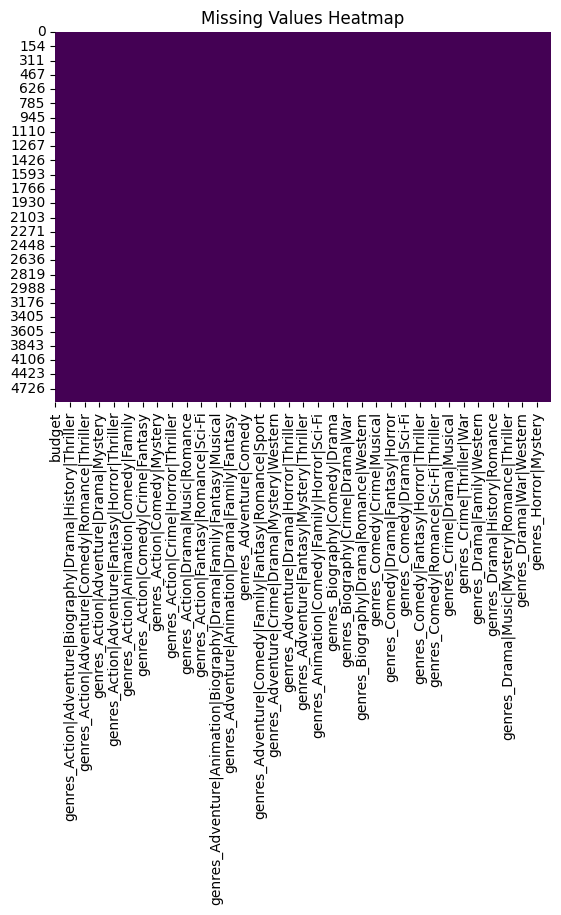

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()